<a href="https://colab.research.google.com/github/Bahodir011/Bahodir011/blob/main/sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [45]:
 y = df['Sales'].to_numpy()
 x = df['TV'].to_numpy()

In [14]:
x

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

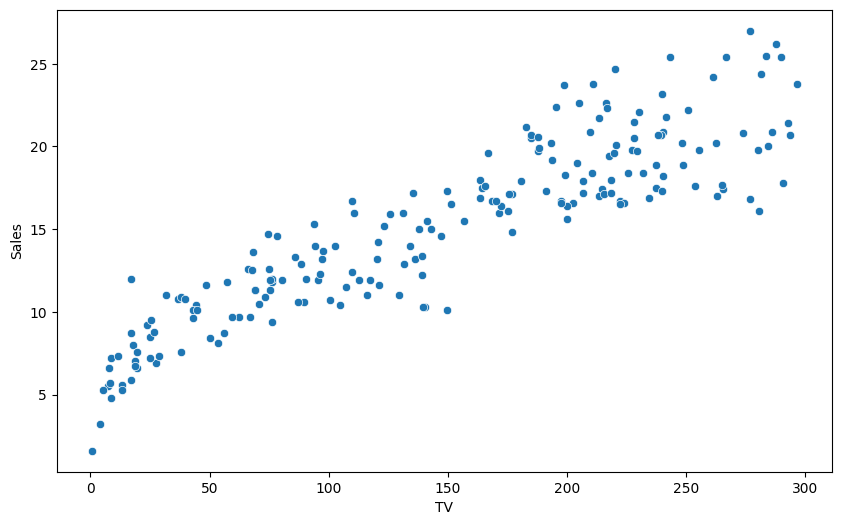

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x = 'TV', y = 'Sales')
plt.show()

In [49]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [50]:
theta1 = sum((x - x_mean)*(y-y_mean))/sum((x-x_mean)**2)
theta1

0.05546477046955879

In [51]:
theta0 = y_mean - theta1*x_mean
theta0

6.974821488229903

In [55]:
x_test = df.sample(10, random_state = 42)['TV'].to_numpy()
y_test = df.sample(10, random_state =42)['Sales'].to_numpy()
y_test

array([16.9, 22.4, 21.4,  7.3, 24.7, 12.6, 22.3,  8.4, 16.5, 16.1])

In [54]:
y_pr = theta0 + theta1*x_test
y_pr

array([16.03221851, 17.81263764, 23.22045276,  7.6237593 , 19.19371042,
       11.14022575, 18.99958373,  9.74806001, 19.31018644, 16.6867028 ])

In [57]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size = 0.10, random_state = 42)


In [65]:
from sklearn import linear_model
Lr_model = linear_model.LinearRegression()

In [66]:
x_train = np.asanyarray(train_set[['TV']])
y_train = np.asanyarray(train_set[['Sales']])
Lr_model.fit(x_train, y_train)

LinearRegression()

In [67]:
theta1 = Lr_model.coef_[0][0]
theta0 = Lr_model.intercept_[0]

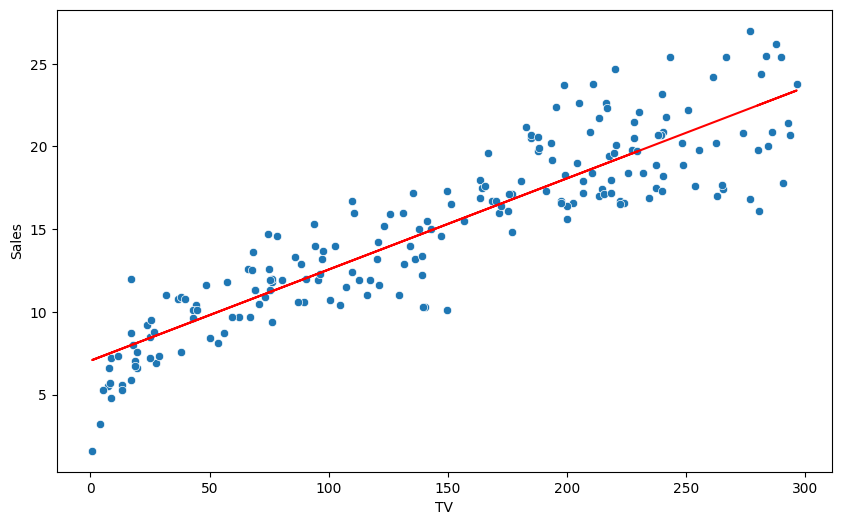

In [68]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x = 'TV', y = 'Sales')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.show()

In [69]:
x_test = np.asanyarray(test_set[['TV']])
y_test = np.asanyarray(test_set[['Sales']])

In [70]:
y_predict = Lr_model.predict(x_test)

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mea = mean_absolute_error(y_test, y_predict)
mse = np.sqrt(mean_squared_error(y_test, y_predict))

print(mea, mse)

2.037955356968121 2.5103822386472214
